# Final Project for Principles of Data Analytics - GMIT 2024/01

#### Author: Gustavo Fernandes

# Palmer Penguins

***

This notebook contains my analusis of the famous palmer panguins dataset.

![Palmer](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Antarctica_6400px_from_Blue_Marble.jpg/240px-Antarctica_6400px_from_Blue_Marble.jpg)

The Data set is avaiable on [GitHub](https://allisonhorst.github.io/palmerpenguins/).





### Imports

We use pandas for the DataFame data structure.

It allows us to invetsigate CSV files, amoungst other features.

In [1]:
# Data frames.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(pd.__file__)
print(pd.__version__)

C:\Users\gusgo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\__init__.py
2.2.1


### Load Data

Load the palmer penguins dara set from a URL

In [2]:
#Load the penguins data set.
df = pd.read_csv("palmerpenguins.csv")

The data is now loaded and we can inspect it.

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Task 01 - Create an overview of the data set and the variables it contains

### Inspect Data

In [4]:
#Look at forst row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [5]:
#Sex of penguins

df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [6]:
#count of Sex of penguins

df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [7]:
#Describe data set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
island_counts = df.groupby(['species', 'island'])['island'].count().unstack()
island_counts.columns = ['Biscoe', 'Dream', 'Torgersen']
print(island_counts)

           Biscoe  Dream  Torgersen
species                            
Adelie       44.0   56.0       52.0
Chinstrap     NaN   68.0        NaN
Gentoo      124.0    NaN        NaN


In [9]:
gender_counts = df.groupby(['species', 'sex'])['sex'].count().unstack()
gender_counts.columns = ['Female', 'Male']
print(gender_counts)

           Female  Male
species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61


In [10]:
penguins_mean = df.groupby('species')[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']].mean().reset_index()
penguins_mean = penguins_mean.merge(gender_counts, on='species')
penguins_mean = penguins_mean.merge(island_counts, on='species')
penguins_mean.columns = ['Species', 'Bill Length Mean (mm)', 'Mean Bill Depth (mm)','Flipper Length (mm)','Mean Body Mass (g)', 'Female (total)', 'Male (total)', 'Biscoe (total)', 'Dream (total)', 'Torgersen (total)']
penguins_mean

,Species,Bill Length Mean (mm),Mean Bill Depth (mm),Flipper Length (mm),Mean Body Mass (g),Female (total),Male (total),Biscoe (total),Dream (total),Torgersen (total)
0,Adelie,38.791391,18.346358,189.953642,3700.662252,73,73,44.0,56.0,52.0
1,Chinstrap,48.833824,18.420588,195.823529,3733.088235,34,34,NaN,68.0,NaN
2,Gentoo,47.504878,14.982114,217.186992,5076.016260,58,61,124.0,NaN,NaN


In [11]:
#print(penguins_mean.to_string(), file=open('penguins.summary.txt', 'w'))
#penguins_mean.plot(x='Species', y=['Bill Length Mean (mm)', 'Mean Bill Depth (mm)', 'Flipper Length (mm)'], kind='bar')
#plt.savefig('penguins_mean.png')



In [12]:
species_order = ['Adelie', 'Gentoo', 'Chinstrap']
df['species'] = pd.Categorical(df['species'], categories=species_order, ordered=True)
df_species = df.sort_values('species')

C:\Users\gusgo\AppData\Local\Temp\ipykernel_20804\2825323563.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_species.groupby('species')['body_mass_g'].plot(kind='hist', legend=True)


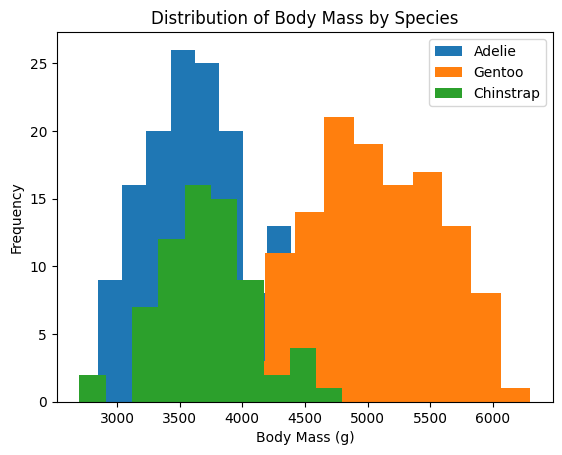

In [13]:
df_species.groupby('species')['body_mass_g'].plot(kind='hist', legend=True)
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Body Mass by Species')
plt.savefig('penguins_mass.png')
plt.show()


C:\Users\gusgo\AppData\Local\Temp\ipykernel_20804\1131931483.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_species.groupby('species')['bill_length_mm'].plot(kind='hist', legend=True)


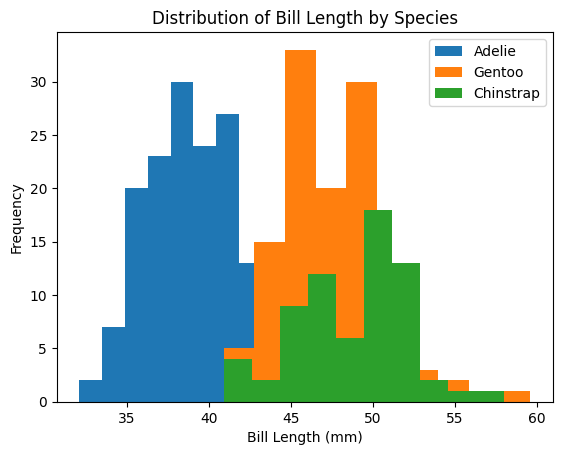

In [14]:
# Plotting the histogram
df_species.groupby('species')['bill_length_mm'].plot(kind='hist', legend=True)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Length by Species')
plt.savefig('penguins_billlenght.png')
plt.show()

C:\Users\gusgo\AppData\Local\Temp\ipykernel_20804\1019843232.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_species.groupby('species')['bill_depth_mm'].plot(kind='hist', legend=True)


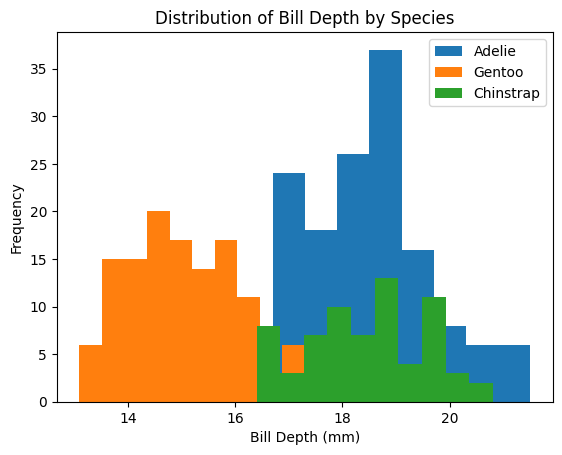

In [15]:
# Plotting the histogram
df_species.groupby('species')['bill_depth_mm'].plot(kind='hist', legend=True)
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Depth by Species')
plt.savefig('penguins_billdepht.png')
plt.show()

C:\Users\gusgo\AppData\Local\Temp\ipykernel_20804\1638811572.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_species.groupby('species')['flipper_length_mm'].plot(kind='hist', legend=True)


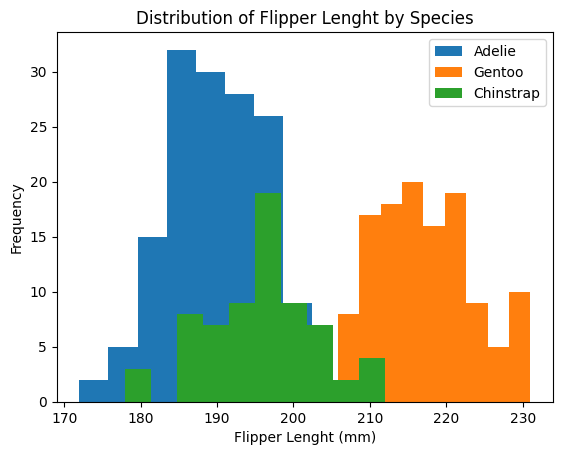

In [16]:
# Plotting the histogram
df_species.groupby('species')['flipper_length_mm'].plot(kind='hist', legend=True)
plt.xlabel('Flipper Lenght (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Flipper Lenght by Species')
plt.savefig('penguins_flipperlenght.png')
plt.show()

In [17]:
island_order = ['Biscoe', 'Dream', 'Torgersen']
df['island'] = pd.Categorical(df['island'], categories=island_order, ordered=True)
df_island = df.sort_values('island')
print(df_island)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
343  Gentoo     Biscoe            49.9           16.1              213.0   
108  Adelie     Biscoe            38.1           17.0              181.0   
109  Adelie     Biscoe            43.2           19.0              197.0   
110  Adelie     Biscoe            38.1           16.5              198.0   
111  Adelie     Biscoe            45.6           20.3              191.0   
..      ...        ...             ...            ...                ...   
72   Adelie  Torgersen            39.6           17.2              196.0   
71   Adelie  Torgersen            39.7           18.4              190.0   
70   Adelie  Torgersen            33.5           19.0              190.0   
68   Adelie  Torgersen            35.9           16.6              190.0   
0    Adelie  Torgersen            39.1           18.7              181.0   

     body_mass_g     sex  
343       5400.0    MALE  
108       3175.0  FEMALE  
109   

C:\Users\gusgo\AppData\Local\Temp\ipykernel_20804\2098178176.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_island.groupby('island')['body_mass_g'].plot(kind='hist', legend=True)


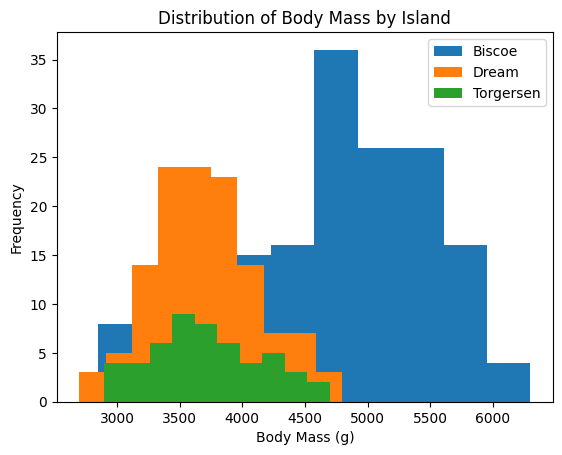

In [18]:
df_island.groupby('island')['body_mass_g'].plot(kind='hist', legend=True)
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Body Mass by Island')
plt.savefig('island_mass.png')
plt.show()

C:\Users\gusgo\AppData\Local\Temp\ipykernel_20804\3343415200.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_island.groupby('island')['bill_length_mm'].plot(kind='hist', legend=True)


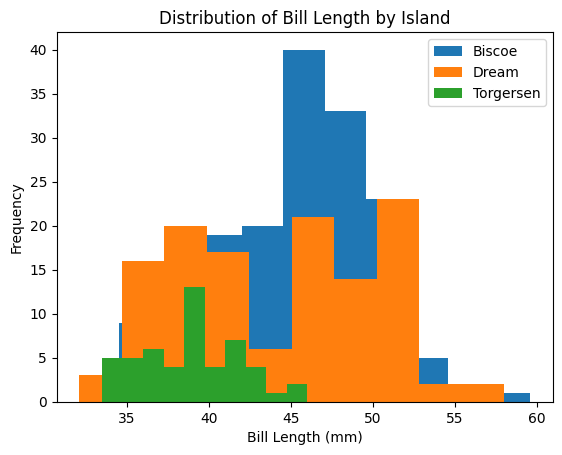

In [19]:
# Plotting the histogram
df_island.groupby('island')['bill_length_mm'].plot(kind='hist', legend=True)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Length by Island')
plt.savefig('island_billlenght.png')
plt.show()

C:\Users\gusgo\AppData\Local\Temp\ipykernel_20804\628632112.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_island.groupby('island')['flipper_length_mm'].plot(kind='hist', legend=True)


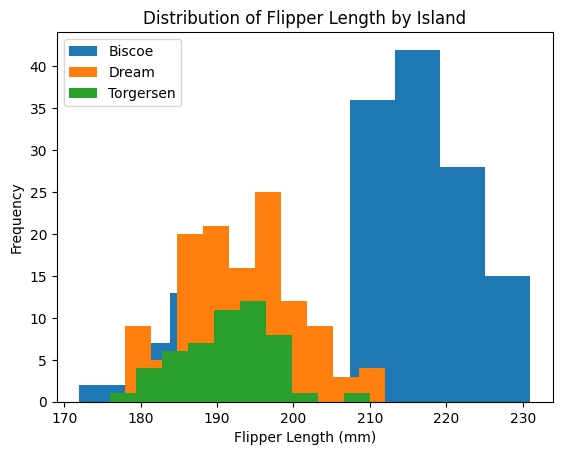

In [20]:
# Plotting the histogram
df_island.groupby('island')['flipper_length_mm'].plot(kind='hist', legend=True)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Flipper Length by Island')
plt.savefig('island_flipperlenght.png')
plt.show()

C:\Users\gusgo\AppData\Local\Temp\ipykernel_20804\1559467124.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_island.groupby('island')['body_mass_g'].plot(kind='hist', legend=True)


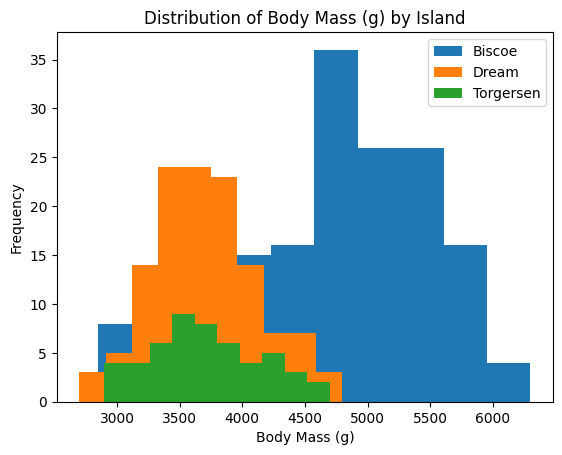

In [21]:
# Plotting the histogram
df_island.groupby('island')['body_mass_g'].plot(kind='hist', legend=True)
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Body Mass (g) by Island')
plt.savefig('island_body_mass.png')
plt.show()

***
### Codes that are interesting but i will not use on that project

In [22]:
'''penguins_group = df.groupby('species')

for species, species_data in penguins_group:
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(f'Specie {species} Histograms')
    for i, column in enumerate(df.columns[2:6]):
        ax = axs[i // 2, i % 2]
        ax.hist(species_data[column])
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    plt.savefig(f'sp_{species}_histograms.png')
    plt.close()'''

"penguins_group = df.groupby('species')\n\nfor species, species_data in penguins_group:\n    fig, axs = plt.subplots(2, 2, figsize=(10, 10))\n    fig.suptitle(f'Specie {species} Histograms')\n    for i, column in enumerate(df.columns[2:6]):\n        ax = axs[i // 2, i % 2]\n        ax.hist(species_data[column])\n        ax.set_title(column)\n        ax.set_xlabel(column)\n        ax.set_ylabel('Frequency')\n    plt.savefig(f'sp_{species}_histograms.png')\n    plt.close()"

In [23]:
'''penguins_group = df.groupby('island')

for island, island_data in penguins_group:
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(f'Island {island} Histograms')
    for i, column in enumerate(df.columns[2:6]):
        ax = axs[i // 2, i % 2]
        ax.hist(island_data[column])
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    plt.savefig(f'is_{island}_histograms.png')
    plt.close()'''

"penguins_group = df.groupby('island')\n\nfor island, island_data in penguins_group:\n    fig, axs = plt.subplots(2, 2, figsize=(10, 10))\n    fig.suptitle(f'Island {island} Histograms')\n    for i, column in enumerate(df.columns[2:6]):\n        ax = axs[i // 2, i % 2]\n        ax.hist(island_data[column])\n        ax.set_title(column)\n        ax.set_xlabel(column)\n        ax.set_ylabel('Frequency')\n    plt.savefig(f'is_{island}_histograms.png')\n    plt.close()"

***
### Resource

https://vlegalwaymayo.atu.ie/

https://ianmcloughlin.github.io/2324_principles_of_data_analytics/

[Co-pilot]

https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

### Tables

***

|Species   |Bill Lenght (mm)| Body Mass (g)|
|----------|---------------:|-------------:|
|Adelie    |             8.8|          3701|
|Chinstrap |            48.8|          3733|
|Gentoo    |            47.5|          5076|


```
pyhton
print("Python is a great language!")
a=a+1
print(a)
```

***

# End